In [1]:
# import dependencies 
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
# file to load 
device_category_data = "Data/d_device_category.csv"
d_genre_data = "Data/d_genre.csv"
station_genre_data = "Data/d_station_genre.csv"
station_activity_data = "Data/f_station_activity.csv"

# read in data files and store in a pandas Data Frame
device_category = pd.read_csv(device_category_data)
d_genre = pd.read_csv(d_genre_data)
station_genre = pd.read_csv(station_genre_data)
station_activity = pd.read_csv(station_activity_data)

In [2]:
# visualize the d_device_category data table 
device_category.head()

,device_id,device_category
0,100,Mobile
1,101,Web
2,102,Consumer Electronics


In [3]:
device_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
device_id          3 non-null int64
device_category    3 non-null object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [4]:
# visualize the d_genre data 
d_genre.head()

,genre_id,parent_genre_id,genre_name,lineage,genre_level_1,genre_level_2,genre_level_3
0,5,1,Classical Music,Classical Music/Music,Music,Classical Music,NaN
1,2091,377,Pac-12 Football,Pac-12/NCAA/Football/Sports,Sports,Football,NCAA
2,2495,2089,Buffalo Bulls,Buffalo Bulls/MAC/NCAA/Football/Sports,Sports,Football,NCAA
3,2945,2881,Rocky Mountain Vibes,Rocky Mountain Vibes/Pacific Coast League/Trip...,Sports,Baseball,Minor League
4,3507,3495,Baltimore Orioles,Baltimore Orioles/AL East/MLB en Español/Baseb...,Sports,Baseball,MLB en Español


In [5]:
d_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 7 columns):
genre_id           2372 non-null int64
parent_genre_id    2372 non-null int64
genre_name         2372 non-null object
lineage            2372 non-null object
genre_level_1      2372 non-null object
genre_level_2      2366 non-null object
genre_level_3      2263 non-null object
dtypes: int64(2), object(5)
memory usage: 129.8+ KB


In [6]:
# visualize the station d_station_genre table 
station_genre.head()

,station_id,genre_id
0,20011,11
1,20017,5
2,20059,255
3,20103,255
4,20345,63


In [7]:
station_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7751 entries, 0 to 7750
Data columns (total 2 columns):
station_id    7751 non-null int64
genre_id      7751 non-null int64
dtypes: int64(2)
memory usage: 121.2 KB


In [8]:
# visualize the f_station_activity table 
station_activity.head()

,activity_date,station_id,device_id,geo,subscription_type,session_starts,listening_hours
0,2015-01-01 00:00:00,20407,101,US,UNKNOWN,446,636.955000
1,2015-01-01 00:00:00,20407,100,INT,UNKNOWN,63,26.867222
2,2015-01-01 00:00:00,20407,102,US,UNKNOWN,1203,24.319167
3,2015-01-01 00:00:00,20407,101,INT,UNKNOWN,4,0.083333
4,2015-01-01 00:00:00,20407,100,US,UNKNOWN,8245,4783.727500


In [9]:
station_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34584 entries, 0 to 34583
Data columns (total 7 columns):
activity_date        34584 non-null object
station_id           34584 non-null int64
device_id            34584 non-null int64
geo                  34584 non-null object
subscription_type    34584 non-null object
session_starts       34584 non-null int64
listening_hours      34584 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ MB


In [10]:
# join the d_device_category table and f_station_activity table on device_id
data_complete_part1 = pd.merge(device_category, station_activity, how="left", on=["device_id"])

In [11]:
# check the information of the table 
data_complete_part1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34584 entries, 0 to 34583
Data columns (total 8 columns):
device_id            34584 non-null int64
device_category      34584 non-null object
activity_date        34584 non-null object
station_id           34584 non-null int64
geo                  34584 non-null object
subscription_type    34584 non-null object
session_starts       34584 non-null int64
listening_hours      34584 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.4+ MB


In [12]:
# join the data_complete_part1 table and f_station_genre table on station_id
data_complete_part2 = pd.merge(data_complete_part1, station_genre, how="left", on=["station_id"])

In [13]:
# check the information of the table 
data_complete_part2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34584 entries, 0 to 34583
Data columns (total 9 columns):
device_id            34584 non-null int64
device_category      34584 non-null object
activity_date        34584 non-null object
station_id           34584 non-null int64
geo                  34584 non-null object
subscription_type    34584 non-null object
session_starts       34584 non-null int64
listening_hours      34584 non-null float64
genre_id             34584 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 2.6+ MB


In [14]:
# noticed that there is only one station_id in the f_station_activity table 
# meaning when combined, the analysis will only be considering listens from station 20407
data_complete_part2['station_id'].value_counts()

20407    34584
Name: station_id, dtype: int64

In [15]:
# join the data_complete_part2 table and d_genere table on genre_id 
data_complete = pd.merge(data_complete_part2, d_genre, how="left", on=["genre_id"])

In [16]:
# check the information of the table 
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34584 entries, 0 to 34583
Data columns (total 15 columns):
device_id            34584 non-null int64
device_category      34584 non-null object
activity_date        34584 non-null object
station_id           34584 non-null int64
geo                  34584 non-null object
subscription_type    34584 non-null object
session_starts       34584 non-null int64
listening_hours      34584 non-null float64
genre_id             34584 non-null int64
parent_genre_id      34584 non-null int64
genre_name           34584 non-null object
lineage              34584 non-null object
genre_level_1        34584 non-null object
genre_level_2        34584 non-null object
genre_level_3        34584 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 4.2+ MB


In [17]:
# remove irrelevant tables
data_final = data_complete.drop(columns=['device_id','genre_id', 
                                         'lineage','genre_level_1',
                                         'genre_level_2', 'genre_level_3',
                                         'parent_genre_id'
                                        ])

In [18]:
# visualize final table 
data_final.head()

,device_category,activity_date,station_id,geo,subscription_type,session_starts,listening_hours,genre_name
0,Mobile,2015-01-01 00:00:00,20407,INT,UNKNOWN,63,26.867222,US News
1,Mobile,2015-01-01 00:00:00,20407,US,UNKNOWN,8245,4783.727500,US News
2,Mobile,2015-01-02 00:00:00,20407,US,UNKNOWN,12339,7780.206111,US News
3,Mobile,2015-01-02 00:00:00,20407,INT,UNKNOWN,55,33.442500,US News
4,Mobile,2015-01-03 00:00:00,20407,INT,UNKNOWN,69,55.539167,US News


In [19]:
# check for null values
data_final.isnull().all()

device_category      False
activity_date        False
station_id           False
geo                  False
subscription_type    False
session_starts       False
listening_hours      False
genre_name           False
dtype: bool

In [20]:
# check information of the table 
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34584 entries, 0 to 34583
Data columns (total 8 columns):
device_category      34584 non-null object
activity_date        34584 non-null object
station_id           34584 non-null int64
geo                  34584 non-null object
subscription_type    34584 non-null object
session_starts       34584 non-null int64
listening_hours      34584 non-null float64
genre_name           34584 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


In [21]:
# export new dataframe to new csv 
data_final.to_csv("data_final.csv", index=False)

In [22]:
# import dependencies 
from datetime import datetime

In [23]:
# convert the activity_date column to datetime and set it to index so that it is easier to work with
data_final['activity_date'] = pd.to_datetime(data_final['activity_date'], infer_datetime_format=True)
forecast_ds = data_final.set_index(['activity_date'])

In [24]:
# visualize the dataframe 
forecast_ds.head()

,device_category,station_id,geo,subscription_type,session_starts,listening_hours,genre_name
activity_date,,,,,,,
2015-01-01,Mobile,20407,INT,UNKNOWN,63,26.867222,US News
2015-01-01,Mobile,20407,US,UNKNOWN,8245,4783.727500,US News
2015-01-02,Mobile,20407,US,UNKNOWN,12339,7780.206111,US News
2015-01-02,Mobile,20407,INT,UNKNOWN,55,33.442500,US News
2015-01-03,Mobile,20407,INT,UNKNOWN,69,55.539167,US News


In [25]:
# remove unwanted columns
forecast_ds= forecast_ds.drop(columns=['device_category','station_id', 
                                         'geo','subscription_type',
                                         'session_starts', 
                                         'genre_name'
                                        ])

In [26]:
# visualize the dataframe 
forecast_ds.head()

,listening_hours
activity_date,
2015-01-01,26.867222
2015-01-01,4783.727500
2015-01-02,7780.206111
2015-01-02,33.442500
2015-01-03,55.539167


In [27]:
# groupyb the sumof each day
forecast_ds = forecast_ds.groupby(['activity_date']).sum()
forecast_ds

,listening_hours
activity_date,
2015-01-01,5471.952222
2015-01-02,9806.400833
2015-01-03,7005.404167
2015-01-04,6195.495000
2015-01-05,14989.861389
...,...
2020-01-22,171319.796944
2020-01-23,154938.972500
2020-01-24,138892.701389


In [28]:
# visualize the dataframe 
forecast_ds.head()

,listening_hours
activity_date,
2015-01-01,5471.952222
2015-01-02,9806.400833
2015-01-03,7005.404167
2015-01-04,6195.495000
2015-01-05,14989.861389


In [29]:
# Add another column ticks which makes an alias for the date
forecast_ds['Ticks'] = range(0, len(forecast_ds.index.values))

In [30]:
# visualize the dataframe 
forecast_ds.head()

,listening_hours,Ticks
activity_date,,
2015-01-01,5471.952222,0
2015-01-02,9806.400833,1
2015-01-03,7005.404167,2
2015-01-04,6195.495000,3
2015-01-05,14989.861389,4


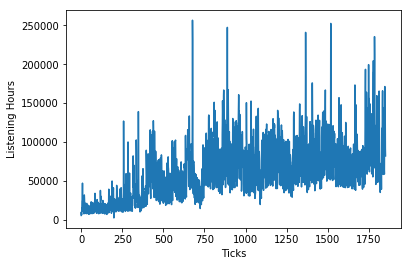

In [31]:
# visualize data 
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Listening Hours')
ax1.plot('Ticks', 'listening_hours', data = forecast_ds)

In [32]:
# for the window
len(forecast_ds) /5

370.4

In [33]:
# reset the index
forecast_ds = forecast_ds.reset_index()
forecast_ds.tail()


,activity_date,listening_hours,Ticks
1847,2020-01-22,171319.796944,1847
1848,2020-01-23,154938.972500,1848
1849,2020-01-24,138892.701389,1849
1850,2020-01-25,91165.945278,1850
1851,2020-01-26,82141.497500,1851


In [34]:
# create a rolling mean column
forecast_ds['Rolling_Mean'] = forecast_ds['listening_hours'].rolling(window = 370).mean()

In [35]:
# visualize the dataframe 
forecast_ds.head()

,activity_date,listening_hours,Ticks,Rolling_Mean
0,2015-01-01,5471.952222,0,NaN
1,2015-01-02,9806.400833,1,NaN
2,2015-01-03,7005.404167,2,NaN
3,2015-01-04,6195.495000,3,NaN
4,2015-01-05,14989.861389,4,NaN


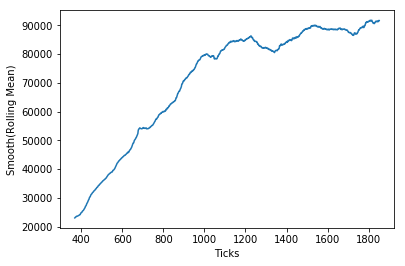

In [36]:
# visualize rolling mean data. Rolling mean got rid of outliers.
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Smooth(Rolling Mean)')
ax1.plot('Ticks', 'Rolling_Mean', data = forecast_ds)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


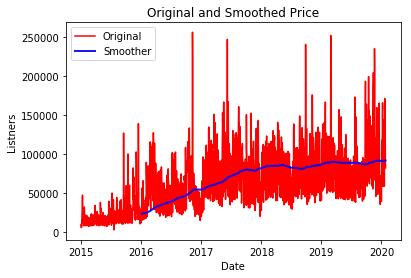

In [37]:
# visualize and compare original data vs rolling mean data
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(forecast_ds['activity_date'], forecast_ds['listening_hours'], color='red', label = 'Original')
ax.plot(forecast_ds['activity_date'], forecast_ds['Rolling_Mean'], color='blue',linewidth = 2, alpha =.9, label = 'Smoother')
ax.set_xlabel('Date')
ax.set_ylabel('Listners')
ax.set_title('Original and Smoothed Price')
ax.legend(loc='best')

In [38]:
# import dependencies 
from sklearn.linear_model import LinearRegression

In [39]:
# filter data for model
filt_forecast = forecast_ds[forecast_ds['Ticks']>= 372]

In [40]:
# use LinearRegression() to create a model
model =LinearRegression().fit(filt_forecast[['Ticks']], filt_forecast['Rolling_Mean'])

m = model.coef_[0]
b = model.intercept_

print(f"equation: y = {round(m,2)}x + {round(b,2)}")

equation: y = 43.32x + 22888.64


In [41]:
# make predictions based on the model 
predictions = model.predict(filt_forecast[['Ticks']])
predictions[0:10]

array([39003.46264253, 39046.78206474, 39090.10148695, 39133.42090916,
       39176.74033138, 39220.05975359, 39263.3791758 , 39306.69859801,
       39350.01802023, 39393.33744244])

In [42]:
# visualize the dataframe 
predictions = pd.DataFrame(data = predictions, index = filt_forecast.index.values, columns = ['Prediction'])

predictions.head()

,Prediction
372,39003.462643
373,39046.782065
374,39090.101487
375,39133.420909
376,39176.740331


In [43]:
# join the predictions to the original data frame
forecast_join = filt_forecast.join(predictions, how='inner')
forecast_join.head()

,activity_date,listening_hours,Ticks,Rolling_Mean,Prediction
372,2016-01-08,40527.506389,372,23331.780360,39003.462643
373,2016-01-09,17192.543056,373,23361.502112,39046.782065
374,2016-01-10,15281.781667,374,23362.291086,39090.101487
375,2016-01-11,32894.487500,375,23411.681002,39133.420909
376,2016-01-12,65614.534444,376,23524.275326,39176.740331


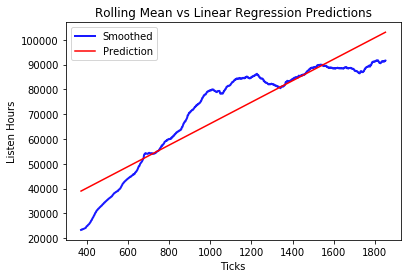

In [44]:
# visualize the trend line from  linear equation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(forecast_join['Ticks'], forecast_join['Rolling_Mean'], color='blue', linewidth = 2, alpha =.9, label ='Smoothed')
ax.plot(forecast_join['Ticks'], forecast_join['Prediction'], color ='red', label='Prediction')
ax.set_title('Rolling Mean vs Linear Regression Predictions')
ax.set_xlabel('Ticks')
ax.set_ylabel('Listen Hours')
ax.legend(loc='best')

In [45]:
# display the r squared value
import sklearn
r_squared = sklearn.metrics.r2_score(forecast_join['Rolling_Mean'], forecast_join['Prediction'])
print(round((r_squared * 100),2),"%")

84.11 %
